<a href="https://colab.research.google.com/github/vinayk19/Assignment/blob/master/Softmax_mnist2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torch import nn, optim, cuda
from torch.utils.data import DataLoader, Dataset
import torchvision
from torchvision import transforms
import numpy as np
import pandas as pd
import matplotlib.pyplot 
import torch.nn.functional as F
import time
import matplotlib.pyplot as plt

In [0]:
from torchvision import datasets, transforms

In [0]:
# train_dataset = datasets.MNIST(root='./mnist_data/',
#                                train=True,
#                                transform=transforms.ToTensor(),
#                                download=True)


MNIST dataset (Train and Test)

In [4]:
train_dataset = datasets.MNIST(root= 'MNIST/processed/training.pt',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)


Extracting MNIST/processed/training.pt/MNIST/raw/train-images-idx3-ubyte.gz to MNIST/processed/training.pt/MNIST/raw


Extracting MNIST/processed/training.pt/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/processed/training.pt/MNIST/raw


Extracting MNIST/processed/training.pt/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/processed/training.pt/MNIST/raw


Extracting MNIST/processed/training.pt/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/processed/training.pt/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [5]:
print(train_dataset.__len__())
# train_dataset.__getitem__(4)[:3].__len__()

train_dataset[2].__len__() 

60000


2

In [0]:
# doc(Dataset.__getitem__)

In [7]:
test_dataset = datasets.MNIST(root= 'MNIST/processed/test.pt',
                               train=False,
                               transform=transforms.ToTensor(),
                               download=True)

Extracting MNIST/processed/test.pt/MNIST/raw/train-images-idx3-ubyte.gz to MNIST/processed/test.pt/MNIST/raw


Extracting MNIST/processed/test.pt/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/processed/test.pt/MNIST/raw


Extracting MNIST/processed/test.pt/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/processed/test.pt/MNIST/raw




Extracting MNIST/processed/test.pt/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/processed/test.pt/MNIST/raw
Processing...
Done!


Data loader (input pipelines)

In [0]:
bs = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=bs, shuffle = True)
# it will give op as batch_idx, data & target $ very imp to understand see code of Dataloader
test_loader = DataLoader(dataset= test_dataset, batch_size= bs, shuffle = True)

how to view image from Dataloader
1. using Next(iter) funciton

In [9]:
# images, labels = next(iter(train_loader)) # we have used the next funciton
# batcg, (images, labels) = next(iter(train_loader)) # where is batchj 
print("train_loader len an dtype is ", len(train_loader), type(train_loader))
print("print len and type of iter ", len(iter(train_loader)), type(iter(train_loader)))  # iter provide stream of data
print("print len and type of next ", len(next(iter(train_loader))), type(next(iter(train_loader)))) #next provide batch from data stream
a , b = next(iter(train_loader)) # as next output is 2 so assigned to two variable.
#now analysing the two vaiable a, b
print("a len:{} and type", len(a), type(a))
print (" as A is torch.tensor so shape method in Tensor", a.shape)
print("b len and type ", len(b), type(b))
print (" as b is torch.tensor so shape method in Tensor", b.shape)
images = a # { batch size , color channel, hight and width so it has 64 image of 1 channnel hight an dwidth}
# each image wii be access by "image[0--64]
labels = b


train_loader len an dtype is  938 <class 'torch.utils.data.dataloader.DataLoader'>
print len and type of iter  938 <class 'torch.utils.data.dataloader._SingleProcessDataLoaderIter'>
print len and type of next  2 <class 'list'>
a len:{} and type 64 <class 'torch.Tensor'>
 as A is torch.tensor so shape method in Tensor torch.Size([64, 1, 28, 28])
b len and type  64 <class 'torch.Tensor'>
 as b is torch.tensor so shape method in Tensor torch.Size([64])

















### based on type find method avalible in that data type in that liberary  example tuple, int str etc in 
python, or torch.tensor in torch, ndarray in numpy etc. So go in that liberary and search  method (shape in torch or len or ..) shape is documented in torch.Tensor it is equivalent to size() 

2. using enumerate funciton after dataLoader
next(enumerate)

In [0]:
examples = enumerate(train_loader)
a, b = next(examples)

In [11]:
print("train_loader len an dtype is ", len(train_loader), type(train_loader))
print("SIZE  of (in place of len) and type of ENUMURATE ", enumerate(train_loader).__sizeof__(), type(enumerate(train_loader)))  # iter provide stream of data
print("NEXT: len and type  ", len(next(enumerate(train_loader))), type(next(enumerate(train_loader)))) #NEXT provide batch from data stream
batch = next(iter(train_loader)) # as next output is 2 so assigned to two variable.

images, labels = batch
print('types:', type(images), type(labels))
print('shapes:', images.shape, labels.shape)
#  another method 
# a, b = batch
# types: <class 'torch.Tensor'> <class 'torch.Tensor'>
# shapes: torch.Size([10, 1, 28, 28]) torch.Size([10])
# #now analysing the two vaiable a, b
# print("a len:{} and type", len(a), type(a))
# print (" as A is torch.tensor so shape method in Tensor", a.shape)
# print("b len and type ", len(b), type(b))
# print (" as b is torch.tensor so shape method in Tensor", b.shape)
# images = a # { batch size , color channel, hight and width so it has 64 image of 1 channnel hight an dwidth}
# # # each image wii be access by "image[0--64]
# labels = b

train_loader len an dtype is  938 <class 'torch.utils.data.dataloader.DataLoader'>
SIZE  of (in place of len) and type of ENUMURATE  48 <class 'enumerate'>
NEXT: len and type   2 <class 'tuple'>
types: <class 'torch.Tensor'> <class 'torch.Tensor'>
shapes: torch.Size([64, 1, 28, 28]) torch.Size([64])


In [12]:
len(images.shape) #note len(x.shape) is same as rank of x

4

In [13]:
# note builtins and object method and providing and outout
print(type(next(enumerate(train_loader))), type(enumerate(train_loader).__next__()))# next is in builtins and methiod as well
print(len(next(enumerate(train_loader))) , enumerate(train_loader).__next__().__len__()) 

<class 'tuple'> <class 'tuple'>
2 2


torch.Size([64, 1, 28, 28])
torch.Size([1, 28, 28])


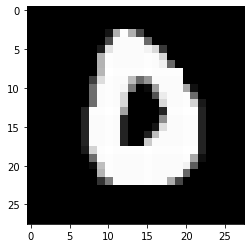

In [14]:
print(images.shape )
print(images[0].shape)
plt.imshow(images[0].reshape(28,28), cmap="gray") 

In [15]:
labels[0]

tensor(0)

good wayt of visualization of picturtes
thanks to https://deeplizard.com/learn/video/mUueSPmcOBc

labels: tensor([0, 3, 7, 0, 1, 5, 4, 8, 2, 1, 8, 1, 4, 6, 1])


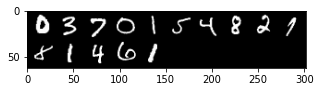

In [16]:
grid = torchvision.utils.make_grid(images[0:15], nrow=10)
plt.figure(figsize=(5,5))
plt.imshow(grid.permute(1,2,0))
print('labels:', labels[0:15])

Plotting of n =6 picsb

In [0]:
# import matplotlib.pyplot as plt

# fig = plt.figure()
# for i in range(6):
#   plt.subplot(2,3,i+1)
#   plt.tight_layout()
#   plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
#   plt.title("Ground Truth: {}".format(example_targets[i]))
#   plt.xticks([])
#   plt.yticks([])
# fig

# Look at test loader as well

In [18]:
a,b = next(iter((test_loader)))
print("a: ", type(a), a.shape)
print("b: ", type(b), a.shape)

a:  <class 'torch.Tensor'> torch.Size([64, 1, 28, 28])
b:  <class 'torch.Tensor'> torch.Size([64, 1, 28, 28])


Q  how to see  access  data sample
2. Check sample fun model and get the output
3  what is test.eval
4. check cmmand insiude test and train function..

In [19]:
device = 'cuda' if cuda.is_available() else 'cpu'
print(f'Trainng Minist model on {device}\n {"=" * 44}')

Trainng Minist model on cuda


In [0]:
class mnist(nn.Module):
  def __init__(self):
    super(mnist, self).__init__()
    self.l1 = nn.Linear(784, 520) #28*28 =784
    self.l2 = nn.Linear(520, 320)
    self.l3 = nn.Linear(320, 240)
    self.l4 = nn.Linear(240, 120)
    self.l5 = nn.Linear(120, 10)
    # self.softmax = F.softmax()
    # self.sigmoid = F.sigmoid()
    # self.relu = F.relu()

  def forward(self, data):
    # make image flat(n,1,28,28) then n*784 to layere1
    # x = data.reshape(1, 784) reshape function make row * column
    # can not use sqeueeze abnd unsquezze
    # view funciton(torch.Tensor) axis with -1 will take all values left after multi of all other axis 
    #  ie 64*1*28*28 => (-1, 784) it will be 64, 784: if (-1, 392)=> shape (128, 392)  
    x= data.view(-1, 784)  # shape is 64, 784
    f1= F.relu(self.l1(x))
    f1= F.relu(self.l2(f1))
    f1= F.relu(self.l3(f1))
    f1= F.relu(self.l4(f1))
    # logit= self.relu(self.l5(f1))
    logit = self.l5(f1)
    return logit # is it required to have activation or not ans no



Analyses of funciton using in Model method 
GOAL : flatening (remove other dimention but here remove BS dimention then flanttening)  
Can not use  reshape, Squeeze, Unsqueeze \n: .
reshape: function make row * column, 
Squeezing: a tensor removes the dimensions or axes that have a length of one.
Unsqueezing: a tensor adds a dimension with a length of one.


---



In [21]:
type(images)

torch.Tensor

In [22]:
model = mnist()
model.to(device)

mnist(
  (l1): Linear(in_features=784, out_features=520, bias=True)
  (l2): Linear(in_features=520, out_features=320, bias=True)
  (l3): Linear(in_features=320, out_features=240, bias=True)
  (l4): Linear(in_features=240, out_features=120, bias=True)
  (l5): Linear(in_features=120, out_features=10, bias=True)
)

criterion and OPtimizer

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=.01, momentum =0.5)

Why every tutorial use “for i, batch in enumerate(data_loader)” even if i var not used later?
Ans: Do you mean i is not used?
No enumerate does not do anything special, but for logging purposes, it is often convenient to have this index of where you are in the epoch.

=========================enumerate queston=====================================

for i, data in enumerate(trainloader, 0): restarts the trainloader iterator on each epoch. That is how python iterators work. Let’s take a simpler example for data in trainloader: python starts by calling trainloader.__iter__() to set up the iterator, this returns an object with a .next() method. Then python calls the .next() method of this object in order to get the first and subsequent values used by the for loop. enumerate just wraps the trainloader iterator in order to make it return a counter along with the value at each iteration.

If the batch number doesn’t divide the data set size, then I guess the last batch will simply be smaller than the others.

Trainingdef

In [0]:
def train(epoch):
  model.train()
  for Epoch in range(5):
    for batch_idx, (data, target) in enumerate(train_loader):
      data, target = data.to(device), target.to(device)
      optimizer.zero_grad()
      logit = model(data)
      loss = criterion(logit, target)
      loss.backward()
      optimizer.step()
      if batch_idx % 500  == 0:
        # print('Train Epoch: {} | Batch Status: {}/{} ({:.0f}% | Loss: {:.6f}', format(
        #     epoch, batch_idx*len(data), len(train_loader.dataset), 100. *batch_idx / len(train_loader), loss.item()
        # ))
        print('Train Epoch: {} | Batch Status: {}/{} ({:.0f}%) | Loss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
        



Testing

In [0]:
def test():
  model.eval()  # what is meaning of it ?
  with torch.no_grad(): # its not compulsary but it will save some merory
  test_loss =0
  correct = 0
  for data, target in test_loader: # enumeration is not required as this is a single batch
    data, target = data.to(device), target.to(device)
    output = model(data)  # output.shape = 64,10
    #sum up the match loss
    test_loss += criterion(output, target).item()
    #get the index of the max value
    pred = output.data.max(1, keepdim=True)[1]  #output.data is ouput data/value ? what is max function https://www.journaldev.com/39463/pytorch-torch-max
    #1 is axis: 0 is row (ie colum wise max:> 1, 10, and 1 is colum ie row wise max)
    # provides max data and and its index
    correct += pred.eq(target.data.view_as(pred)).cpu().sum()

  test_loss /= len(test_loader.dataset)
  print(f'===========================\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} '
          f'({100. * correct / len(test_loader.dataset):.0f}%)')
  # print(f'====================\n test set : Average loss: {test_loss: .4f}, Accuracy: {correct}/{len(test_loader.dataset)} ' 
          # f'({100. * correct/len(test_loader.dataset):. 0f}%)')
          
#         ===========================
# Test set: Average loss: 0.0016, Accuracy: 9787/10000 (98%)
# Testing timr: 0m 25s


Understanding model.eval() : 

1.   model.eval() will notify all your layers that you are in eval mode, that way, batchnorm or dropout layers will work in eval mode instead of training mode.
2.  torch.no_grad() impacts the autograd engine and deactivate it. It will reduce memory usage and speed up computations but you won’t be able to backprop (which you don’t want in an eval script).List item
3. https://discuss.pytorch.org/t/model-eval-vs-with-torch-no-grad/19615
4. no_grad is a context manager to work with the autograd engine while eval() is changing the state of an nn.Module.
5. There is no such thing as “test mode”.
Only train() and eval().
Both bn and dropout will work in both cases but will have different behaviour as you expect them to have different behaviours during training and evaluation. For example, during evaluation, dropout should be disabled and so is replaced with a no op. Similarly, bn should use saved statistics instead of batch data and so that’s what it’s doing in eval mode.

https://discuss.pytorch.org/u/ptrblck
During eval Dropout is deactivated and just passes its input.
During the training the probability p is used to drop activations. Also, the activations are scaled with 1./p as otherwise the expected values would differ between training and eval.

drop = nn.Dropout()

x = torch.ones(1, 10)

# Train mode (default after construction)
drop.train()

print(drop(x))

# Eval mode
drop.eval()

print(drop(x))

 "======================"
how to use 
==========================

model.eval()

with torch.no_grad():

    for batch in val_loader:

        #some code



Understanding Max function : https://www.journaldev.com/39463/pytorch-torch-max:    note class 'torch.return_types.max'> do not have lenth or shape it has __sizeof__

In [26]:
a,b = next(iter((test_loader)))
print("a: ", type(a), a.shape)
print("b: ", type(b), b.shape)
data, target = a.to(device), b.to(device)
output1 = model(data)
print("output data : ",type(output1), output1.shape)

a:  <class 'torch.Tensor'> torch.Size([64, 1, 28, 28])
b:  <class 'torch.Tensor'> torch.Size([64])
output data :  <class 'torch.Tensor'> torch.Size([64, 10])


In [0]:
pred2 = output1.data.max(1, keepdim=True)[1]
pred1 = output1.data.max(1, keepdim=True)[0]
pred = pred1 + pred2
# pred = torch.max(output1.data, dim=1)
print(pred.shape) # torch.Size([64, 1])
# pred
o1 = torch.cat((output1, pred1), 1)
# o1
# con = output + pred

In [28]:
print("max function", type(output1.data.max(1)), len(output1.data.max(1)))

max function <class 'torch.return_types.max'> 2


In [47]:
c, d = pred1, pred2
print("Type c & d: ", type(c), type(d))
print("Shape c & d: ", c.shape, d.shape)
# print(c, d)

Type c & d:  <class 'torch.Tensor'> <class 'torch.Tensor'>
Shape c & d:  torch.Size([64, 1]) torch.Size([64, 1])


In [0]:
c, d = output1.data.max(1,keepdim=True)
print("Type c & d: ", type(c), type(d))
print("Shape c & d: ", c.shape, d.shape)
# print(c,  d)

In [31]:
if __name__ == '__main__':
  since = time.time()
  for epoch in range(1,2):
    epoch_start = time.time()
    train(epoch)
    m, s = divmod(time.time() - epoch_start, 60)
    print(f'Training timr: {m:.0f}m {s:.0f}s')
    test()
    m, s = divmod(time.time() - epoch_start, 60)
    print(f'Testing timr: {m:.0f}m {s:.0f}s')
  m, s = divmod(time.time() - since, 60)
  print(f'Total Time: {m:.0f}m {s:.0f}s\nModel was trained on {device}!')

Train Epoch: 1 | Batch Status: 0/60000 (0%) | Loss: 2.314526
Train Epoch: 1 | Batch Status: 32000/60000 (53%) | Loss: 2.283820
Train Epoch: 1 | Batch Status: 0/60000 (0%) | Loss: 1.659568
Train Epoch: 1 | Batch Status: 32000/60000 (53%) | Loss: 0.567163
Train Epoch: 1 | Batch Status: 0/60000 (0%) | Loss: 0.652426
Train Epoch: 1 | Batch Status: 32000/60000 (53%) | Loss: 0.290251
Train Epoch: 1 | Batch Status: 0/60000 (0%) | Loss: 0.228349
Train Epoch: 1 | Batch Status: 32000/60000 (53%) | Loss: 0.313108
Train Epoch: 1 | Batch Status: 0/60000 (0%) | Loss: 0.130860
Train Epoch: 1 | Batch Status: 32000/60000 (53%) | Loss: 0.225873
Training timr: 0m 26s
Test set: Average loss: 0.0027, Accuracy: 9490/10000 (95%)
Testing timr: 0m 27s
Total Time: 0m 27s
Model was trained on cuda!
